# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.4106,  0.1699,  0.0717,  0.6338,  0.8254,  0.5299,  0.2447,  0.5709,  0.3718,  0.6425,
        0.7062,  0.8304,  0.3875,  0.942 ,  0.8689,  0.1602,  0.875 ,  0.7593,  0.5519,  0.8974,
        0.3995,  0.6796,  0.141 ,  0.0799,  0.0205,  0.2655,  0.0152,  0.932 ,  0.9879,  0.1028])

In [6]:
y

array([  9.2318,   8.5096,   8.2152,   9.9013,  10.4762,   9.5896,   8.7342,   9.7126,   9.1155,
         9.9274,  10.1187,  10.4911,   9.1626,  10.8259,  10.6066,   8.4806,  10.6251,  10.2779,
         9.6556,  10.6922,   9.1984,  10.0387,   8.423 ,   8.2396,   8.0615,   8.7964,   8.0457,
        10.796 ,  10.9638,   8.3085])

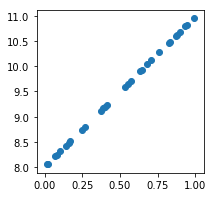

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.0971

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani